# Python Programming Tutorials (Computer Science)

The 🦉 [Socratica](https://www.youtube.com/channel/UCW6TXMZ5Pq6yL6_k5NZ2e0Q) YouTube Channel has a 33-video [playlist](https://www.youtube.com/playlist?list=PLi01XoE8jYohWFPpC17Z-wWhPOSuh8Er-) devoted to the introduction of Python.

## #26 JSON in Python

In [1]:
%run video-00.py

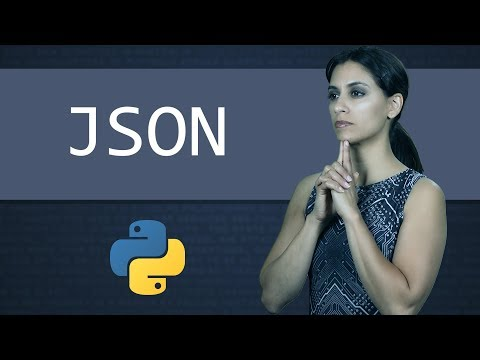

In [2]:
from IPython import display

video = display.YouTubeVideo('pTT7HMqDnJw')
video
display.HTML(f'<a href="{video.src}">link</a>')

From [json.org](https://www.json.org/json-en.html):

>JSON (JavaScript Object Notation) is a lightweight data-interchange format. It is easy for humans to read and write. It is easy for machines to parse and generate.

Python supports JSON with the `json` module:

In [4]:
import json

[i for i in dir(json) if not(i.startswith('__'))]

['JSONDecodeError',
 'JSONDecoder',
 'JSONEncoder',
 '_default_decoder',
 '_default_encoder',
 'codecs',
 'decoder',
 'detect_encoding',
 'dump',
 'dumps',
 'encoder',
 'load',
 'loads',
 'scanner']

We start with the _dump_ and _load_ concepts in this module:

In [6]:
help(json.dumps)
help(json.dump)

Help on function dumps in module json:

dumps(obj, *, skipkeys=False, ensure_ascii=True, check_circular=True, allow_nan=True, cls=None, indent=None, separators=None, default=None, sort_keys=False, **kw)
    Serialize ``obj`` to a JSON formatted ``str``.
    
    If ``skipkeys`` is true then ``dict`` keys that are not basic types
    (``str``, ``int``, ``float``, ``bool``, ``None``) will be skipped
    instead of raising a ``TypeError``.
    
    If ``ensure_ascii`` is false, then the return value can contain non-ASCII
    characters if they appear in strings contained in ``obj``. Otherwise, all
    such characters are escaped in JSON strings.
    
    If ``check_circular`` is false, then the circular reference check
    for container types will be skipped and a circular reference will
    result in an ``OverflowError`` (or worse).
    
    If ``allow_nan`` is false, then it will be a ``ValueError`` to
    serialize out of range ``float`` values (``nan``, ``inf``, ``-inf``) in
    stric

In [7]:
help(json.loads)
help(json.load)

Help on function loads in module json:

loads(s, *, encoding=None, cls=None, object_hook=None, parse_float=None, parse_int=None, parse_constant=None, object_pairs_hook=None, **kw)
    Deserialize ``s`` (a ``str``, ``bytes`` or ``bytearray`` instance
    containing a JSON document) to a Python object.
    
    ``object_hook`` is an optional function that will be called with the
    result of any object literal decode (a ``dict``). The return value of
    ``object_hook`` will be used instead of the ``dict``. This feature
    can be used to implement custom decoders (e.g. JSON-RPC class hinting).
    
    ``object_pairs_hook`` is an optional function that will be called with the
    result of any object literal decoded with an ordered list of pairs.  The
    return value of ``object_pairs_hook`` will be used instead of the ``dict``.
    This feature can be used to implement custom decoders.  If ``object_hook``
    is also defined, the ``object_pairs_hook`` takes priority.
    
    ``parse

The _s_ at the end of these method names indicate _str_ implying that we are likely to be _dumping_ and _loading_ by files default:

In [9]:
json_file = open('./video-26.json', 'r', encoding='utf-8')
movie = json.load(json_file)
json_file.close()

type(movie)
movie

dict

{'title': 'Gattaca',
 'release_year': 1997,
 'is_awesome': True,
 'won_oscar': False,
 'actors': ['Ethan Hawke', 'Uma Thurman', 'Alan Arkin', 'Loren Dean'],
 'budget': None,
 'credits': {'director': 'Andrew Niccol',
  'writer': 'Adrew Niccol',
  'composer': 'Michael Nyman',
  'cinematographer': 'Sławomir Idziak'}}

We see that `movie` is a Python dictionary. Numeric, Boolean and null values were correctly translated into Python types.

Now, the JSON string:

In [10]:
json_string = '''
{
    "title": "Tron: Legacy",
    "composer": "Daft Punk",
    "release_year": "2010",
    "budget": "170000000",
    "actors": null,
    "won_oscar": false
}
'''

tron = json.loads(json_string)

type(tron)
tron

dict

{'title': 'Tron: Legacy',
 'composer': 'Daft Punk',
 'release_year': '2010',
 'budget': '170000000',
 'actors': None,
 'won_oscar': False}

Note that we called `.loads()` without an encoding. According to the documentation above:

>The ``encoding`` argument is ignored and deprecated.

We can show how Python translates its type back to the JSON string format with `.dumps()`:

In [11]:
json.dumps(movie)

'{"title": "Gattaca", "release_year": 1997, "is_awesome": true, "won_oscar": false, "actors": ["Ethan Hawke", "Uma Thurman", "Alan Arkin", "Loren Dean"], "budget": null, "credits": {"director": "Andrew Niccol", "writer": "Adrew Niccol", "composer": "Michael Nyman", "cinematographer": "S\\u0142awomir Idziak"}}'

Python defaults to ASCII, we see this in the use of Unicode escape strings for `S\\u0142awomir Idziak`. To avoid this default behavior and preserve the current encoding, use the `ensure_ascii` parameter:

In [12]:
json.dumps(movie, ensure_ascii=False)

'{"title": "Gattaca", "release_year": 1997, "is_awesome": true, "won_oscar": false, "actors": ["Ethan Hawke", "Uma Thurman", "Alan Arkin", "Loren Dean"], "budget": null, "credits": {"director": "Andrew Niccol", "writer": "Adrew Niccol", "composer": "Michael Nyman", "cinematographer": "Sławomir Idziak"}}'

### Dumping JSON to a File

We have seen that JSON and `dict` are related. We can convert `dict` to JSON and write it to disk:

In [19]:
movie2 = {
    'title': 'Minority Report',
    'director': 'Steven Spielberg',
    'composer': 'John Williams',
    'actors': [
        'Tom Cruise',
        'Colin Farrell',
        'Samantha Morton',
        'Max von Sydow',
    ],
    'is_awesome': True,
    'budget': 102000000,
    'cinematographer': 'Janusz Kami\u0144ski',
}

file2 = open('./video-26.txt', 'w', encoding='utf-8')
json.dump(movie2, file2, ensure_ascii=False)
file2.close()

Let us verify the contents of the file:

In [20]:
%cat video-26.txt

{"title": "Minority Report", "director": "Steven Spielberg", "composer": "John Williams", "actors": ["Tom Cruise", "Colin Farrell", "Samantha Morton", "Max von Sydow"], "is_awesome": true, "budget": 102000000, "cinematographer": "Janusz Kamiński"}